In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set the CSV file path and year for analysis
csv_file = 'nz_reviews_with_routes.csv'  
chosen_year = "ALL"

reviews_df = pd.read_csv(csv_file)
reviews_df.head()


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,textblob_sentiment,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via,is_domestic
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,Positive,Positive,Positive,2024,auckland,NZ,queenstown,NZ,NaN,True
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Negative,Negative,Negative,2024,auckland,NZ,napier,NZ,NaN,True
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Negative,Negative,Negative,2024,napier,NZ,auckland,NZ,NaN,True
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,Negative,Negative,Negative,2024,san francisco,US,queenstown,NZ,Auckland,False
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,Positive,Positive,Positive,2024,auckland,NZ,hobart,AU,NaN,False


# OVERALL PERFORMANCE TRENDS

# What is the overall trend in customer ratings and sentiment throughout the year? Are there any noticeable peaks or drops?

In [44]:
# Define a function to parse 'Month YYYY' format
def parse_date(date_flown_str):
    return pd.to_datetime(date_flown_str, format='%Y-%m-%d')

# Apply the function to the 'date_flown' column
reviews_df['date'] = reviews_df['date'].apply(parse_date)

# Extract month and year
reviews_df['month'] = reviews_df['date'].dt.month_name()
reviews_df['year'] = reviews_df['date'].dt.year

# Display the updated dataframe
reviews_df.head()


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via,is_domestic,month
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,Positive,Positive,2024,auckland,NZ,queenstown,NZ,NaN,True,August
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Negative,Negative,2024,auckland,NZ,napier,NZ,NaN,True,August
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Negative,Negative,2024,napier,NZ,auckland,NZ,NaN,True,August
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,Negative,Negative,2024,san francisco,US,queenstown,NZ,Auckland,False,July
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,Positive,Positive,2024,auckland,NZ,hobart,AU,NaN,False,July


In [45]:
# Apply the condition: if chosen_year is 'ALL', use the entire DataFrame; otherwise, filter for the chosen year
if chosen_year == 'ALL':
    year_reviews = reviews_df
else:
    year_reviews = reviews_df[reviews_df['year'] == chosen_year]

# Show the first few rows of the resulting DataFrame
year_reviews.head()


,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,vader_sentiment,rating_sentiment,year,departure,departure_country,arrival,arrival_country,via,is_domestic,month
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,Positive,Positive,2024,auckland,NZ,queenstown,NZ,NaN,True,August
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,Negative,Negative,2024,auckland,NZ,napier,NZ,NaN,True,August
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,Negative,Negative,2024,napier,NZ,auckland,NZ,NaN,True,August
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,Negative,Negative,2024,san francisco,US,queenstown,NZ,Auckland,False,July
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,Positive,Positive,2024,auckland,NZ,hobart,AU,NaN,False,July


In [46]:
# Count the total number of reviews for the chosen year
total_reviews = len(year_reviews)

# Display the result
print(f"Total reviews for {chosen_year}: {total_reviews}")

Total reviews for ALL: 560


In [47]:
# Replace NaN values in 'vader_sentiment' column with 0
year_reviews['vader_sentiment'] = year_reviews['vader_sentiment'].fillna(0)

# Group by month and sentiment, then count the number of reviews
monthly_sentiment_counts = year_reviews.groupby(['month', 'vader_sentiment']).size().unstack(fill_value=0)

# Sort months in the calendar order
monthly_sentiment_counts = monthly_sentiment_counts.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Replace any NaN in the final DataFrame with 0
monthly_sentiment_counts = monthly_sentiment_counts.fillna(0)

monthly_sentiment_counts


vader_sentiment,Negative,Neutral,Positive
month,,,
January,35,1,30
February,26,1,22
March,15,0,19
April,10,1,24
May,21,2,22
June,13,1,29
July,17,1,27
August,22,0,32
September,20,1,24


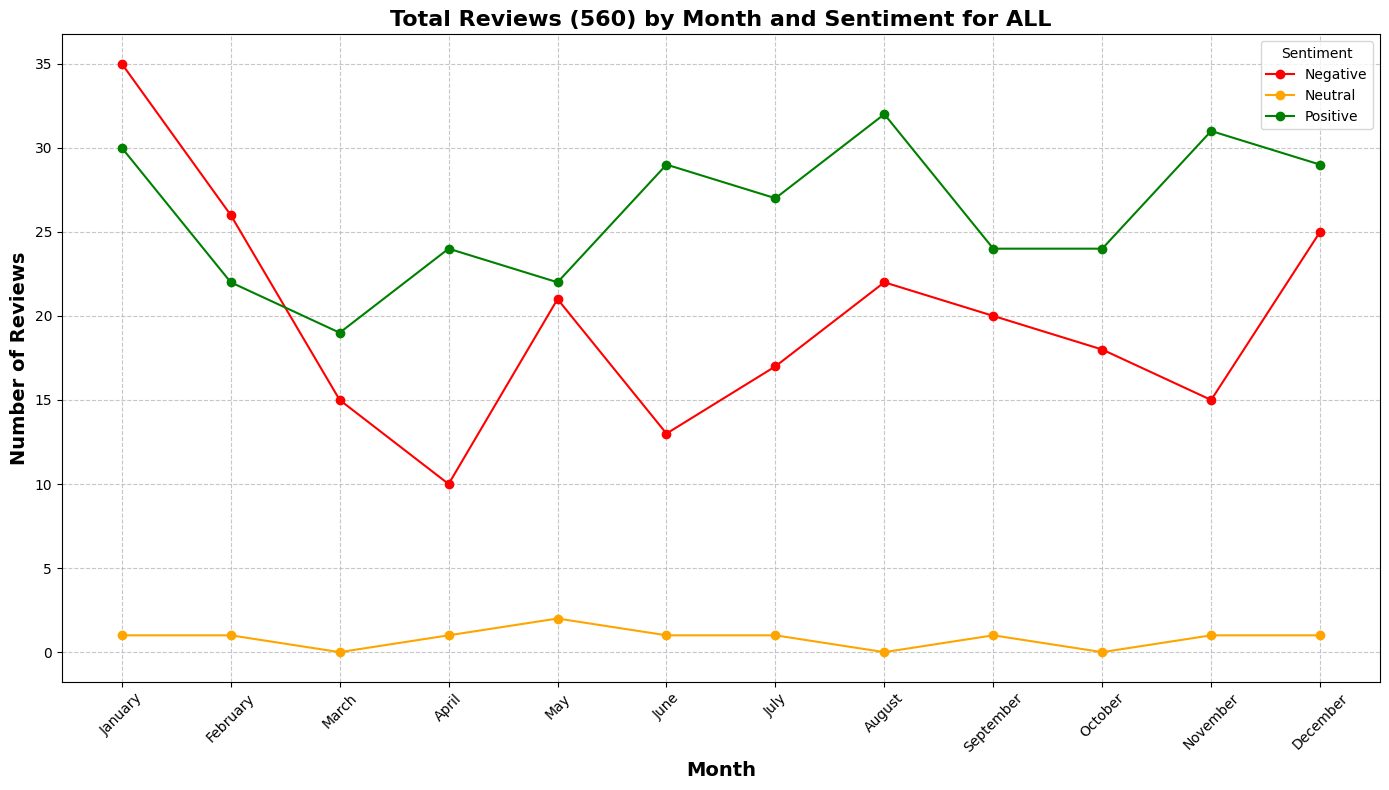

In [48]:
# Define color mapping for sentiments
color_map = {
    'Negative': 'red',
    'Neutral': 'orange',
    'Positive': 'green'
}

plt.figure(figsize=(14, 8))

for sentiment in monthly_sentiment_counts.columns:
    # Use the predefined colors for each sentiment
    plt.plot(monthly_sentiment_counts.index, monthly_sentiment_counts[sentiment], 
             marker='o', label=f'{sentiment}', color=color_map.get(sentiment, 'blue'))  # Default to blue if sentiment not found

plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=14, fontweight='bold')
plt.title(f'Total Reviews ({total_reviews}) by Month and Sentiment for {chosen_year}', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# PERFORMANCE BY ROUTE

# How do domestic flights compare to international flights in terms of customer satisfaction and feedback?

In [49]:
# Identify the rating columns
rating_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'ground_service', 'value_for_money',
                   'inflight_entertainment', 'wifi_&_connectivity']

# Group data by route type (Domestic/International) and calculate average ratings
average_ratings = year_reviews.groupby(['is_domestic'])[rating_columns].mean().reset_index()

# Display the average ratings for validation
average_ratings

,is_domestic,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,value_for_money,inflight_entertainment,wifi_&_connectivity
0,False,2.778027,2.991031,2.345291,2.773543,2.746637,2.609865,0.172646
1,True,2.605263,2.903509,1.210526,2.263158,2.377193,-0.105263,-0.298246


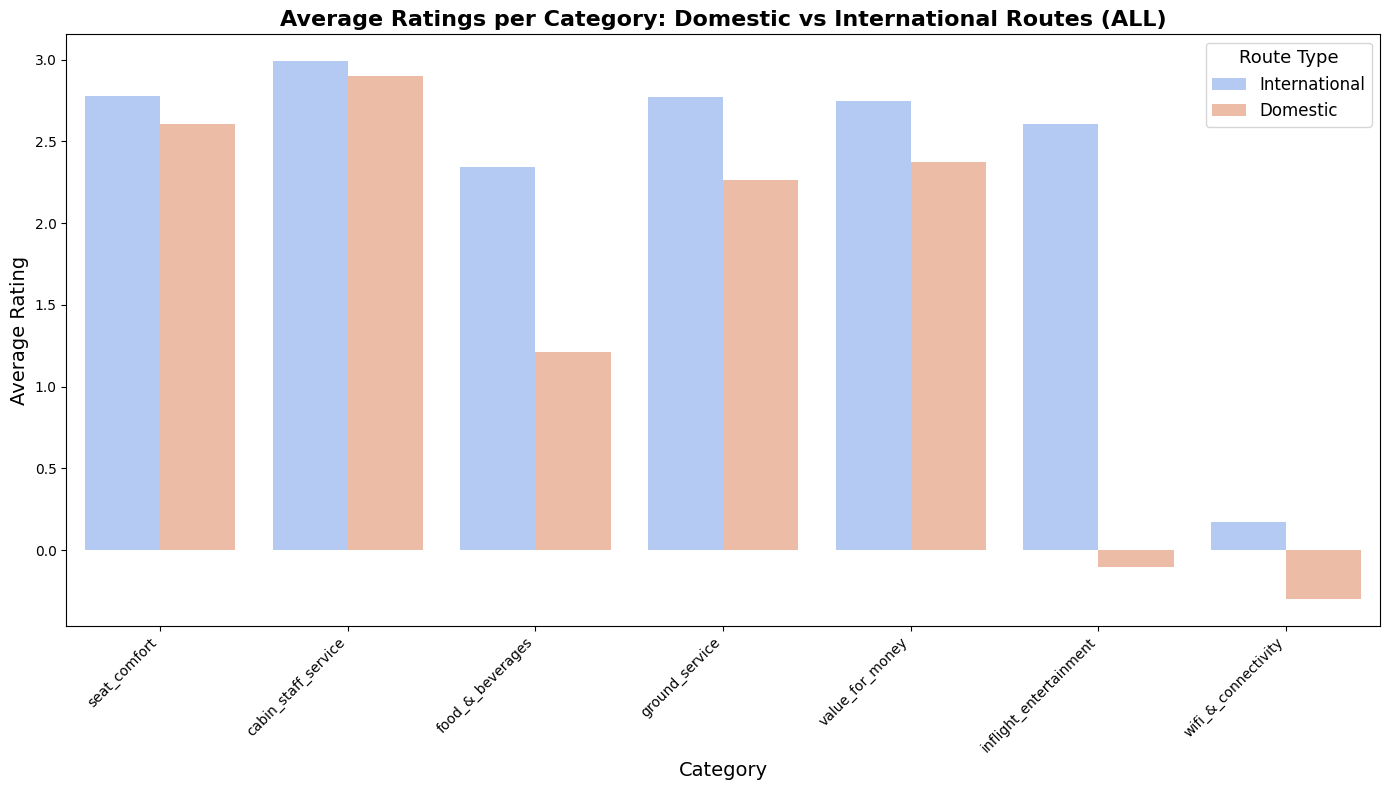

In [50]:
average_ratings_melted = average_ratings.melt(id_vars=['is_domestic'], 
                                              value_vars=rating_columns,
                                              var_name='category', 
                                              value_name='average_rating')

plt.figure(figsize=(14, 8))
sns.barplot(data=average_ratings_melted, x='category', y='average_rating', hue='is_domestic', palette='coolwarm')
plt.title(f'Average Ratings per Category: Domestic vs International Routes ({chosen_year})', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Domestic' if label == 'True' else 'International' for label in labels], 
           title='Route Type', title_fontsize='13', fontsize='12')

plt.tight_layout()
plt.show()


# CUSTOMER DEMOGRAPHICS

# Which type of traveler gives the highest/lowest ratings?

In [51]:
# Checking the unique types of travelers
year_reviews['type_of_traveller'].unique()

# Checking the distribution of ratings
year_reviews['rating'].describe()


count    560.000000
mean       4.800000
std        3.530496
min        1.000000
25%        1.000000
50%        4.000000
75%        9.000000
max       10.000000
Name: rating, dtype: float64

In [52]:
# Grouping by type of traveller and calculating mean and median ratings
traveller_rating_summary = year_reviews.groupby('type_of_traveller')['rating'].agg(['mean', 'median', 'count']).reset_index()

# Sorting to find the highest and lowest mean ratings
traveller_rating_summary = traveller_rating_summary.sort_values(by='mean', ascending=False)

traveller_rating_summary

,type_of_traveller,mean,median,count
3,Solo Leisure,5.035000,4.0,200
1,Couple Leisure,4.901639,4.0,183
0,Business,4.630952,3.0,84
2,Family Leisure,4.247312,3.0,93


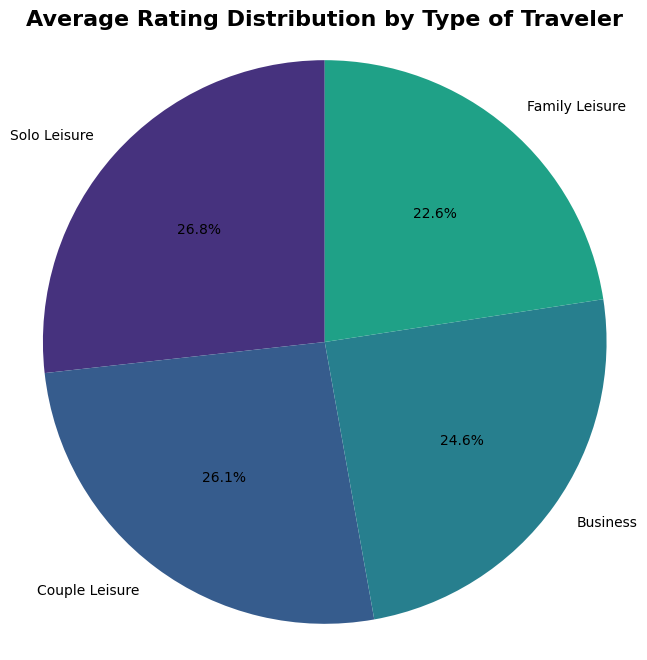

In [53]:
labels = traveller_rating_summary['type_of_traveller']
average_ratings = traveller_rating_summary['mean']

plt.figure(figsize=(8, 8))
plt.pie(average_ratings, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title('Average Rating Distribution by Type of Traveler', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [55]:
# Group by type of traveler and sentiment label
sentiment_distribution = year_reviews.groupby(['type_of_traveller', 'vader_sentiment']).size().unstack(fill_value=0)

sentiment_distribution

# Normalize to get percentage distribution
sentiment_distribution_percentage = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0)

# Display the sentiment distribution as a percentage
sentiment_distribution_percentage

vader_sentiment,Negative,Neutral,Positive
type_of_traveller,,,
Business,0.392857,0.000000,0.607143
Couple Leisure,0.442623,0.016393,0.540984
Family Leisure,0.483871,0.032258,0.483871
Solo Leisure,0.390000,0.020000,0.590000


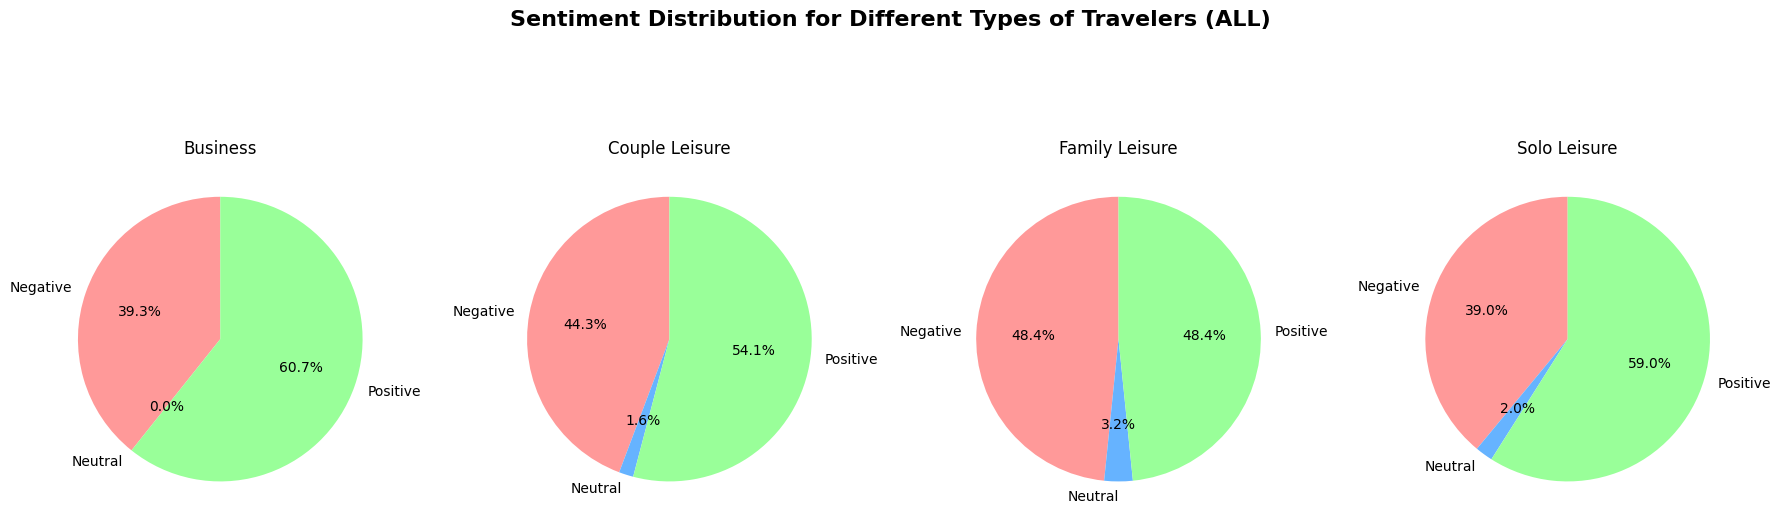

In [56]:
traveller_types = sentiment_distribution.index

fig, axes = plt.subplots(1, len(traveller_types), figsize=(18, 6))

colors = ['#ff9999','#66b3ff','#99ff99']

# Iterate through each type of traveler and create a pie chart
for i, traveller_type in enumerate(traveller_types):
    sentiments = sentiment_distribution.loc[traveller_type]
    
    axes[i].pie(sentiments, labels=sentiments.index, autopct='%1.1f%%', startangle=90, colors=colors)
    
    axes[i].set_title(traveller_type)

plt.tight_layout()
plt.suptitle(f'Sentiment Distribution for Different Types of Travelers ({chosen_year})', y=1.05, fontsize=16, fontweight='bold')
plt.show()


# How do ratings vary by Seat Type (e.g. Economy, Business)?

In [57]:
# Group by seat type and calculate rating statistics
seat_rating_summary = year_reviews.groupby('seat_type')['rating'].agg(['mean', 'median', 'count']).reset_index()

# Sort the values to see which seat types have the highest/lowest ratings
seat_rating_summary = seat_rating_summary.sort_values(by='mean', ascending=False)

# Display the summary
seat_rating_summary


,seat_type,mean,median,count
0,Business Class,6.697674,8.0,86
2,Premium Economy,5.957447,8.0,47
1,Economy Class,4.290398,3.0,427


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_7475/300095252.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seat_type', y='mean', data=seat_rating_summary, palette='coolwarm')


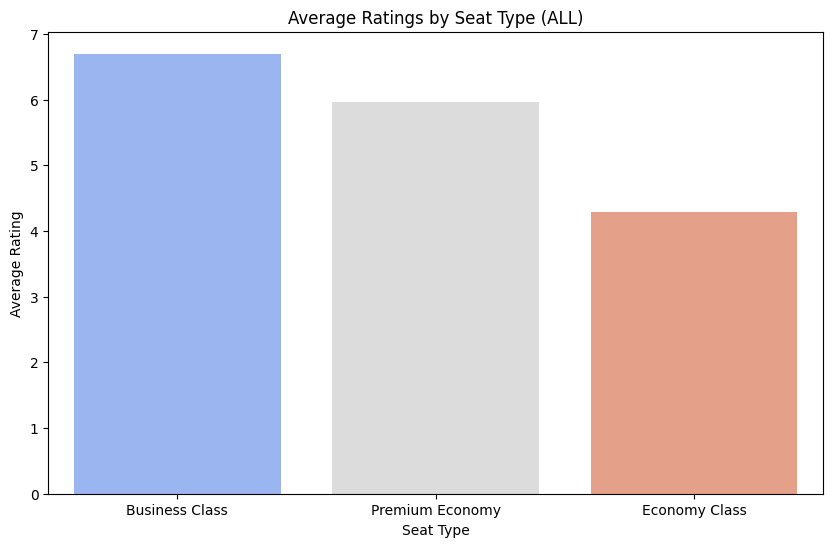

In [58]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the mean ratings by seat type
sns.barplot(x='seat_type', y='mean', data=seat_rating_summary, palette='coolwarm')

# Add labels and title
plt.title(f'Average Ratings by Seat Type ({chosen_year})')
plt.xlabel('Seat Type')
plt.ylabel('Average Rating')

# Display the plot
plt.show()


# SENTIMENT ANALYSIS

# What key themes emerge from Air New Zealand's customer reviews across different sentiments?

In [59]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
import re

In [60]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [61]:
# Common words to exclude from analysis
excluded_terms = ["air_new_zealand", "flight", "auckland", "christchurch", "wellington", 
                  "new", "zealand", "air", "nz", "even_though", "via", "av", "sec", "could"]

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

# Function to generate exactly 3-word n-grams and join words with underscores
def generate_ngrams(text, n=3):
    words = text.split()
    # Generate only 4-word n-grams
    ngrams_list = ["_".join(ngram) for ngram in ngrams(words, n)]
    return ngrams_list


# Function to get top N n-grams while excluding certain terms
def get_top_n_ngrams(sentiment_reviews, n=20):
    all_ngrams = []
    for review in sentiment_reviews:
        all_ngrams.extend(generate_ngrams(review)) 
    
    # Remove excluded terms
    filtered_ngrams = [ngram for ngram in all_ngrams if all(term not in ngram for term in excluded_terms)]
    
    # Count frequencies of remaining n-grams
    ngram_freq = Counter(filtered_ngrams)
    return ngram_freq.most_common(n)

# Preprocess the reviews
year_reviews['cleaned_review'] = year_reviews['review_content'].apply(preprocess_text)

In [62]:
# Get the top 10 n-grams for each sentiment
positive_reviews = year_reviews[year_reviews['vader_sentiment'] == 'Positive']['cleaned_review']
negative_reviews = year_reviews[year_reviews['vader_sentiment'] == 'Negative']['cleaned_review']
neutral_reviews = year_reviews[year_reviews['vader_sentiment'] == 'Neutral']['cleaned_review']

top_positive_ngrams = get_top_n_ngrams(positive_reviews, 20)
top_negative_ngrams = get_top_n_ngrams(negative_reviews, 20)
top_neutral_ngrams = get_top_n_ngrams(neutral_reviews, 10)


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_7475/3996943579.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')


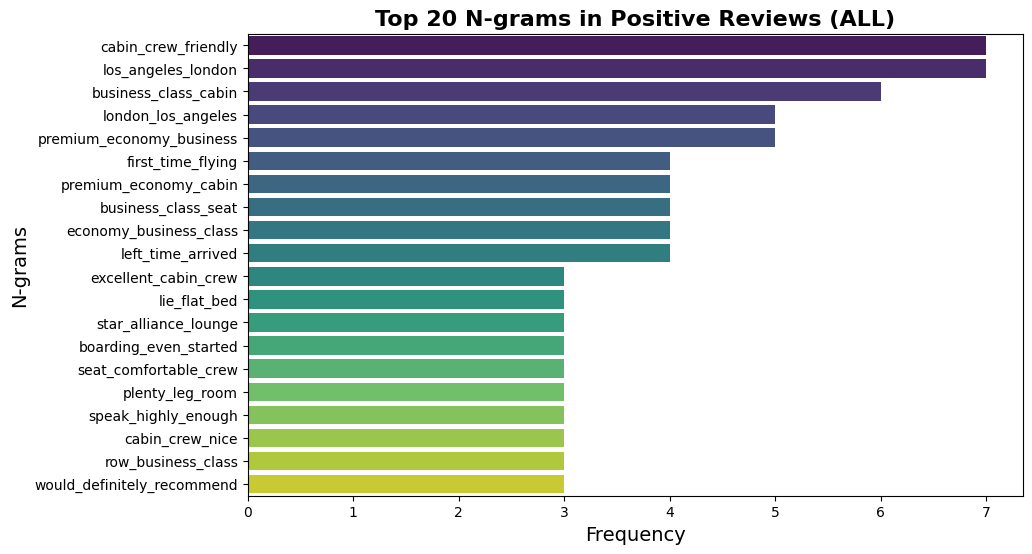

/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_7475/3996943579.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')


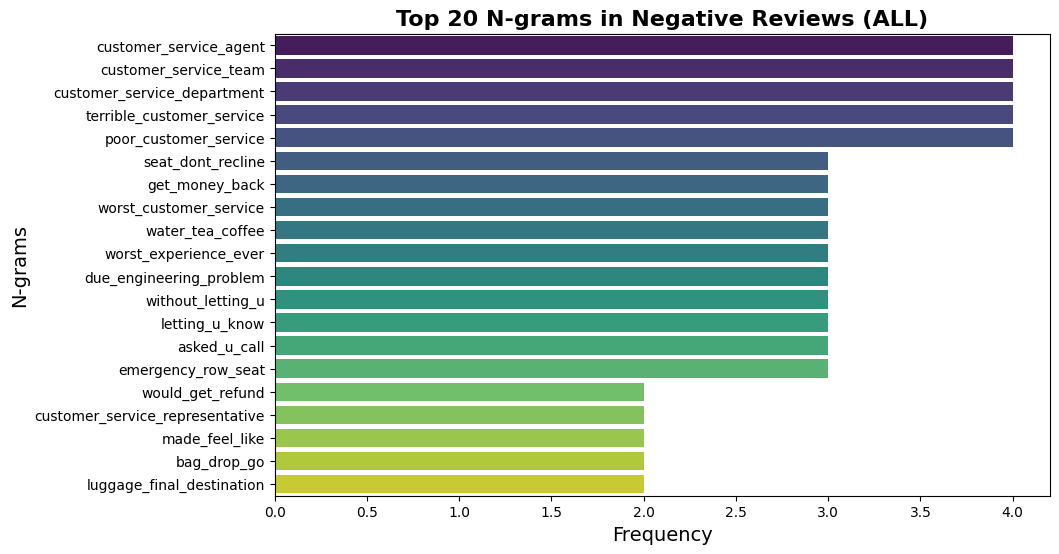

/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_7475/3996943579.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')


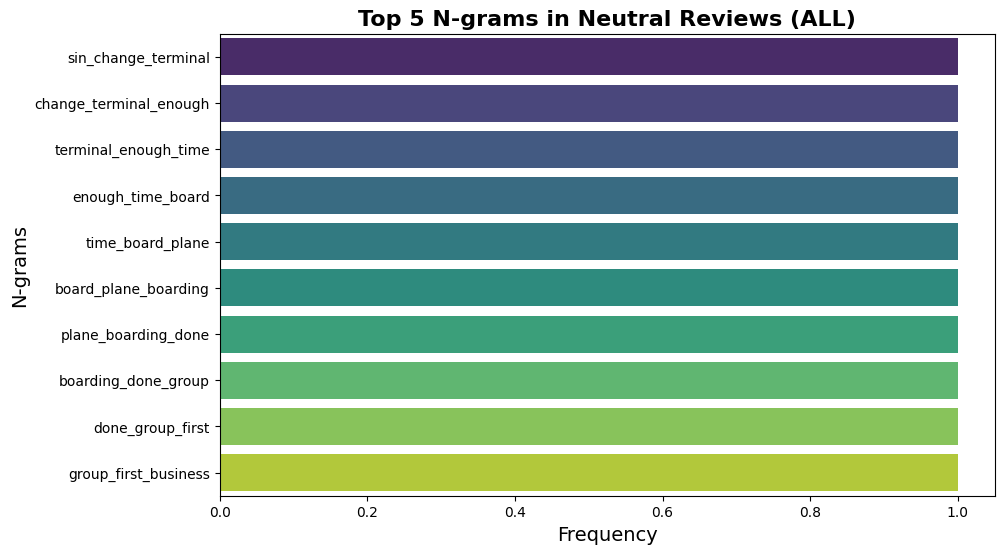

In [63]:
# Function to plot the n-gram frequencies
def plot_ngram_frequencies(ngram_freq, title):
    if not ngram_freq:  # Check if the n-gram list is empty
        print(f"No n-grams to plot for {title}.")
        return
    
    ngrams, frequencies = zip(*ngram_freq)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(frequencies), y=list(ngrams), palette='viridis')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('N-grams', fontsize=14)
    plt.show()

# Plot the n-gram frequencies for each sentiment, checking if they exist
plot_ngram_frequencies(top_positive_ngrams, f'Top 20 N-grams in Positive Reviews ({chosen_year})')
plot_ngram_frequencies(top_negative_ngrams, f'Top 20 N-grams in Negative Reviews ({chosen_year})')
plot_ngram_frequencies(top_neutral_ngrams, f'Top 5 N-grams in Neutral Reviews ({chosen_year})')


In [64]:
from PIL import Image
from wordcloud import WordCloud
import numpy as np


In [65]:
# Load the airplane mask image
mask = np.array(Image.open('/Users/ainna/Documents/Coding Crusade with Ainna/air-new-zealand-customer-feedback-analysis/airplane-vector-36294843 copy.jpg'))

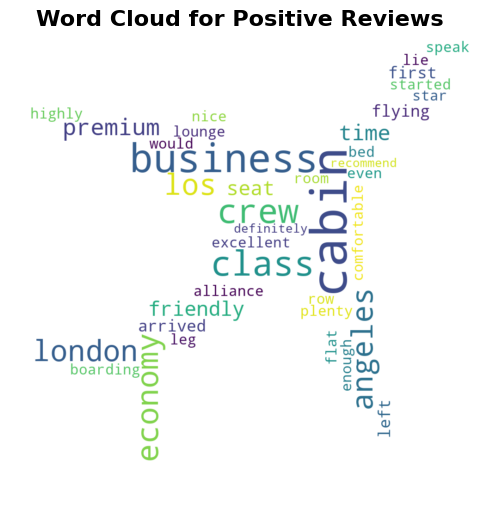

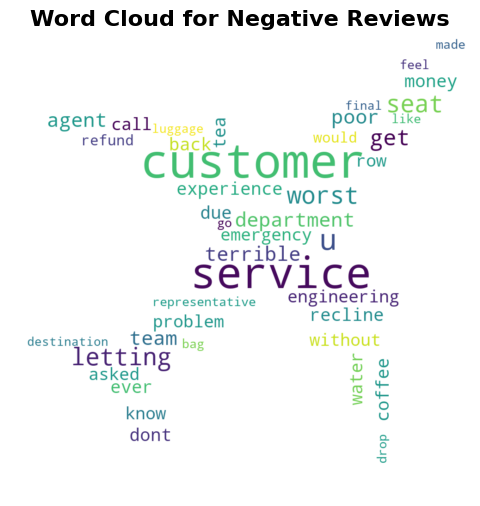

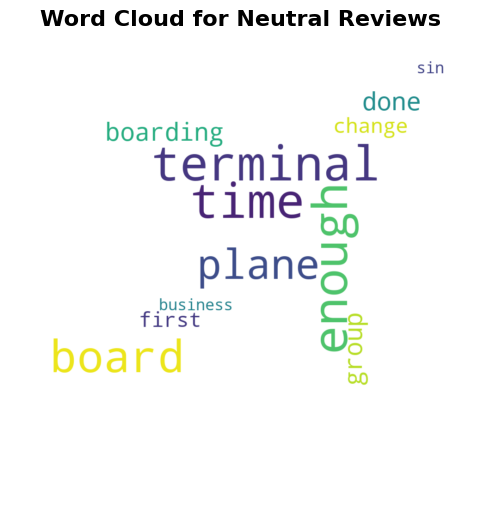

In [66]:
def preprocess_ngrams(ngram_freq):
    # Split multi-word n-grams into individual words
    word_list = []
    for ngram, freq in ngram_freq.items():
        words = ngram.split('_')
        word_list.extend(words * freq)
    return Counter(word_list)

def plot_wordcloud(ngram_freq, title, mask):
    if not ngram_freq:  # Check if n-gram frequencies are empty
        print(f"No n-grams to plot for {title}.")
        return
    
    # Preprocess n-grams to individual words
    word_freq_dict = preprocess_ngrams(ngram_freq)
    
    # Create and generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis', mask=mask).generate_from_frequencies(word_freq_dict)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

# Plot the word clouds for each sentiment, checking if they exist
plot_wordcloud(dict(top_positive_ngrams), 'Word Cloud for Positive Reviews', mask)
plot_wordcloud(dict(top_negative_ngrams), 'Word Cloud for Negative Reviews', mask)
plot_wordcloud(dict(top_neutral_ngrams), 'Word Cloud for Neutral Reviews', mask)


# PERFORMANCE BY ROUTE

# How do customer sentiments vary across different regions and flight routes?

In [67]:
# Mapping vader_sentiment to numerical values
sentiment_mapping = {'Negative': -1.0, 'Neutral': 0.0, 'Positive': 1.0}
year_reviews['vader_sentiment_numeric'] = year_reviews['vader_sentiment'].map(sentiment_mapping)
year_reviews

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,year,departure,departure_country,arrival,arrival_country,via,is_domestic,month,cleaned_review,vader_sentiment_numeric
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,...,2024,auckland,NZ,queenstown,NZ,NaN,True,August,honestly quite surprised air new zealand take ...,1.0
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,...,2024,auckland,NZ,napier,NZ,NaN,True,August,air new zealand domestic service getting worse...,-1.0
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,...,2024,napier,NZ,auckland,NZ,NaN,True,August,air new zealand bumped u flight time made u ad...,-1.0
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,...,2024,san francisco,US,queenstown,NZ,Auckland,False,July,unfortunately service care quality airline goi...,-1.0
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,...,2024,auckland,NZ,hobart,AU,NaN,False,July,checkin efficient boarding departure late seem...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2015-07-14,Air New Zealand customer review,4,Boeing 777,Solo Leisure,Economy Class,London to Los Angeles,June 2015,1.0,2.0,...,2015,london,US,los angeles,US,NaN,False,July,time since used airline hesitation bad experie...,1.0
556,2015-07-03,Air New Zealand customer review,4,B777-300,Business,Economy Class,Auckland to LAX,June 2015,2.0,4.0,...,2015,auckland,NZ,lax,US,NaN,False,July,five return trip nz n america usually one euro...,1.0
557,2015-06-29,Air New Zealand customer review,10,Boeing 777-300,Solo Leisure,Business Class,Los Angeles to Auckland,June 2015,5.0,5.0,...,2015,los angeles,US,auckland,NZ,NaN,False,June,lax akl superb flight thanks professional crew...,1.0
558,2015-06-26,Air New Zealand customer review,9,777-300,Business,Business Class,LAX to BNE via AKL,June 2015,5.0,5.0,...,2015,lax,US,bne,AU,AKL,False,June,two wonderful flight engaging helpful crew che...,1.0


In [68]:
# Domestic and International routes
domestic_routes = year_reviews[year_reviews['is_domestic'] == True]
international_routes = year_reviews[year_reviews['is_domestic'] == False]

# Calculate the mean sentiment per route
domestic_mean_sentiment = domestic_routes.groupby('route')['vader_sentiment_numeric'].mean().reset_index()
international_mean_sentiment = international_routes.groupby('route')['vader_sentiment_numeric'].mean().reset_index()

# Sort by mean sentiment in descending order (best routes at the top)
domestic_mean_sentiment_sorted = domestic_mean_sentiment.sort_values(by='vader_sentiment_numeric', ascending=False)
international_mean_sentiment_sorted = international_mean_sentiment.sort_values(by='vader_sentiment_numeric', ascending=False)


In [69]:
# Function to map color based on sentiment value
def get_color(sentiment_value):
    if sentiment_value > 0:
        return 'green'
    else:
        return 'orange'  # amber for negative and neutral

# Apply color mapping
domestic_mean_sentiment_sorted['color'] = domestic_mean_sentiment_sorted['vader_sentiment_numeric'].apply(get_color)
international_mean_sentiment_sorted['color'] = international_mean_sentiment_sorted['vader_sentiment_numeric'].apply(get_color)

# Extract color lists for domestic and international routes
domestic_colors = domestic_mean_sentiment_sorted['color'].tolist()
international_colors = international_mean_sentiment_sorted['color'].tolist()


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_7475/3400080917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vader_sentiment_numeric', y='route', data=domestic_mean_sentiment_sorted, palette=domestic_colors)


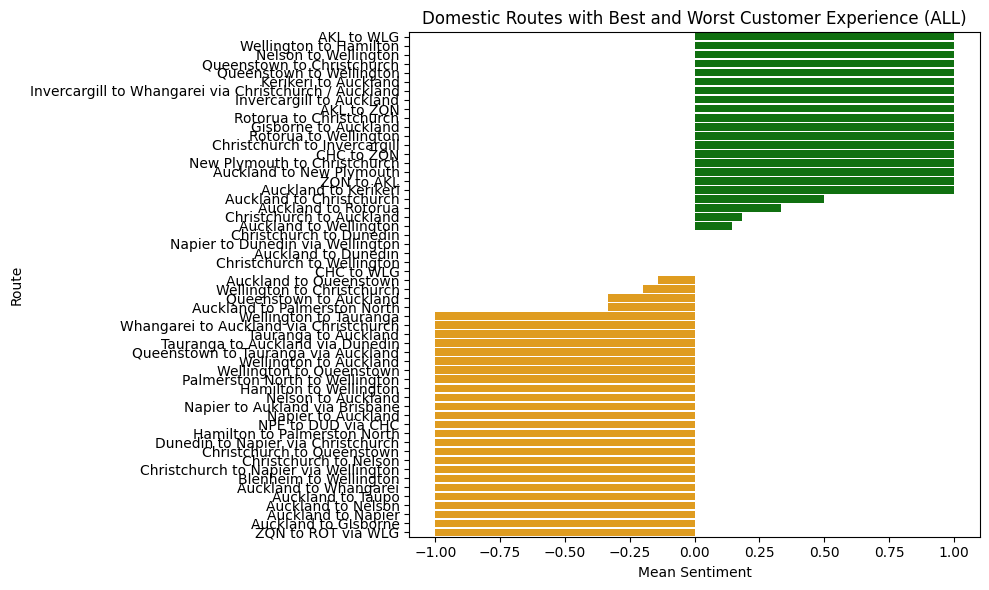

/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_7475/3400080917.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vader_sentiment_numeric', y='route', data=international_mean_sentiment_sorted, palette=international_colors)


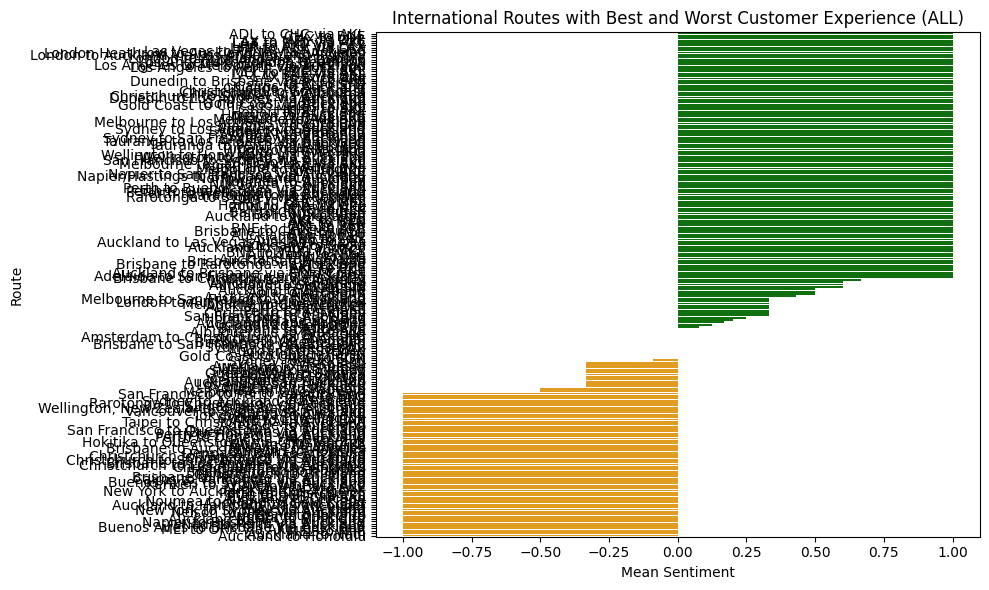

In [70]:
# Plot domestic routes
plt.figure(figsize=(10, 6))
sns.barplot(x='vader_sentiment_numeric', y='route', data=domestic_mean_sentiment_sorted, palette=domestic_colors)
plt.title(f"Domestic Routes with Best and Worst Customer Experience ({chosen_year})")
plt.xlabel("Mean Sentiment")
plt.ylabel("Route")
plt.tight_layout()
plt.show()

# Plot international routes
plt.figure(figsize=(10, 6))
sns.barplot(x='vader_sentiment_numeric', y='route', data=international_mean_sentiment_sorted, palette=international_colors)
plt.title(f"International Routes with Best and Worst Customer Experience ({chosen_year})")
plt.xlabel("Mean Sentiment")
plt.ylabel("Route")
plt.tight_layout()
plt.show()